In [5]:
import pandas as pd
import numpy as np
import warnings
# import xgboost as xgb

from sklearn.manifold import TSNE
from pickle import dump, load
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
warnings.filterwarnings('ignore')
from sklearn import metrics

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [1]:
cvs = pd.read_csv('../../new_csv_out/train_mfpts_ani.csv')

NameError: name 'pd' is not defined

In [8]:
cvs

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047,a/i
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
21052,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
21053,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
21054,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [9]:

X = cvs.iloc[:, 0:2048]
y = cvs['a/i']
X = np.log1p(np.abs(X)) 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21051,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.693147,0.0,0.0,0.0,0.0,0.0
21052,0.0,0.693147,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
21053,0.0,0.693147,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
21054,0.0,0.693147,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Step 1: Apply t-SNE directly to the scaled data

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

tsne = TSNE(n_components=2, random_state=42,  perplexity=20)  # Reduce dimensions to 2d for visualization
x_tsne = tsne.fit_transform(X)

# Step 2: Plotting the t-SNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1],c = y, s=50, alpha=0.7, cmap='viridis')
plt.title('t-SNE Visualization')
# Adding colorbar to show the label legend
plt.colorbar(scatter, label='Class Label')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.savefig('../mfpts_output/p20__st_tsne_plot.png', format='png')
plt.show()

In [17]:

import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
arr = cvs.iloc[:,:-1]
def tversky_index(A, B, alpha=0.5, beta=0.5):
    """
    Compute the Tversky similarity index.
    A, B: Binary vectors (numpy arrays)
    alpha, beta: Control feature weighting
    """
    A, B = np.array(A), np.array(B)
    intersection = np.sum(A & B)  # Count common features
    only_A = np.sum(A & ~B)  # Features in A but not B
    only_B = np.sum(B & ~A)  # Features in B but not A

    return intersection / (intersection + alpha * only_A + beta * only_B + 1e-9)  # Avoid division by zero

def tversky_distance(A, B, alpha=0.5, beta=0.5):
    """Convert similarity to distance."""
    return 1 - tversky_index(A, B, alpha, beta)

# Example binary dataset (replace with your data)
binary_data = arr.to_numpy()  # 100 samples, 217 features

# Compute pairwise Tversky distances
tversky_distances = squareform(pdist(binary_data, metric=tversky_distance))

# Apply DBSCAN with precomputed Tversky distance matrix
dbscan = DBSCAN(eps=0.3, min_samples=5, metric='precomputed')  # Tune eps based on the dataset
clusters = dbscan.fit_predict(tversky_distances)

# Visualize clusters (using t-SNE)
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(binary_data)

plt.figure(figsize=(8, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("DBSCAN Clustering with Tversky Similarity")
plt.colorbar(label="Cluster Label")
plt.show()



KeyboardInterrupt: 

In [10]:
clf1 = SVC(kernel='rbf', random_state=42)
# clf2 = xgb.XGBClassifier(tree_method = 'exact', early_stopping_round = 2)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = LogisticRegression(max_iter=1000, random_state=42)
clf5 = RandomForestClassifier(n_estimators=300, random_state=42)

ensemble_model = VotingClassifier(estimators=[('svc', clf1), ('xgb', clf2), ('knn', clf3), ('lr', clf4), ('rf', clf5)], voting='hard')
ensemble_model.fit(X_train, y_train)

NameError: name 'clf2' is not defined

In [7]:
y_pred = ensemble_model.predict(X_test)
out = classification_report(y_test, y_pred, output_dict=True)

In [8]:
df_out = pd.DataFrame(out).transpose()
df_out

,precision,recall,f1-score,support
-1.0,0.816779,0.680321,0.742331,1245.000000
1.0,0.891257,0.944959,0.917323,3452.000000
accuracy,0.874814,0.874814,0.874814,0.874814
macro avg,0.854018,0.812640,0.829827,4697.000000
weighted avg,0.871516,0.874814,0.870939,4697.000000


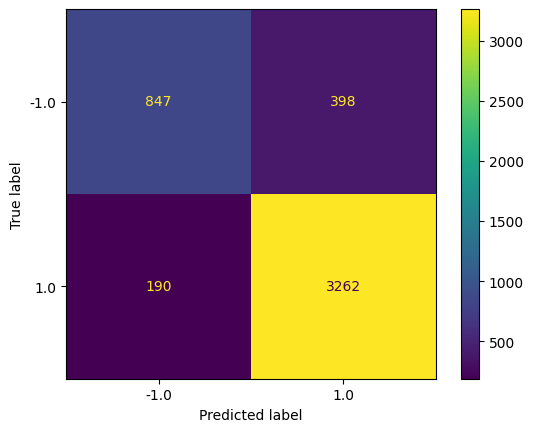

In [9]:
disp = ConfusionMatrixDisplay.from_estimator(ensemble_model, X_test, y_test)

In [10]:
def generate_fpts(data_list):
    # Create an empty list to store fingerprints
    Mfpts = []
    for data in data_list:
            # Convert SMILES string to a molecule
        mol = Chem.MolFromSmiles(data)
        
        # Check if molecule is valid
        if mol:
            # Calculate Morgan fingerprint and append to the list
            mfpt = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048)
            Mfpts.append(mfpt)

            
    return np.array(Mfpts)
    
data_list = ['C1=CC(=CC=C1C#N)C(C2=CC=C(C=C2)C#N)N3C=NC=N3', #inactive
    'CC1CCCC2(C(O2)CC(NC(=O)CC(C(C(=O)C(C1O)C)(C)C)O)C(=CC3=CSC(=N3)C)C)C',
    'CCCCCOC(=O)NC1=NC(=O)N(C=C1F)C2C(C(C(O2)C)O)O',
    'Oc1ccccc1', #inactive
    'c1ccccc1', #inactive
    'CCS(=O)(=O)O.CN1CCN(CC1)CC(=O)N(C)C2=CC=C(C=C2)N=C(C3=CC=CC=C3)C4=C(NC5=C4C=CC(=C5)C(=O)OC)O',
    'CCCCCOC(=O)NC1=NC(=O)N(C=C1F)C2C(C(C(O2)C)O)O',
    'CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4',
    'COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC',
    'C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)(F)F',
    'COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4',
    'CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3NC4=CC(=C(C=C4)OCC5=CC(=CC=C5)F)Cl',
    'c1cn(c(=O)nc1N)[C@H]2C([C@@H]([C@H](O2)CO)O)(F)F',
    'O1C(=O)C(=O)O[Pt-2]12[NH2+]C0CCCCC0[NH2+]2']


# data_list_df = pd.DataFrame(data_list, columns=['Smiles'])
# Generate MACCS keys
fingerprints = generate_fpts(data_list)

# Add MACCS keys to DataFrame
# final = pd.concat([data_list_df, pd.DataFrame(fingerprints)], axis=1)
# final
print(len(fingerprints))

14


In [11]:
for i in fingerprints:
    x = i.reshape(1, -1)
    predicted_activity = ensemble_model.predict(x)
    print(predicted_activity)

[-1.]
[-1.]
[1.]
[-1.]
[-1.]
[1.]
[1.]
[-1.]
[-1.]
[-1.]
[1.]
[1.]
[-1.]
[-1.]
